
# Exploring the structure and content of the partial My Seizure Gauge dataset

The dataset obtained from the Seer Medical plaform (via epilepsyecosystem.org) does not correspond to the eval.ai challenge dataset.
This notebook was used to obtain some preliminary insights and explore the structure and content of the dataset.
Parquet file sets for each sensor are available in a directory structure organised into subdirectories by monitored subjects.




In [ ]:
import pandas as pd
from datetime import datetime
from pathlib import Path
import neurokit2 as nk
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
from seerpy.utils import plot_eeg

In [61]:
# example subject from the dataset
SUBJECT_ID = 'MSEL_01676'
DATA_DIR = '/Users/jozsi/PycharmProjects/seer-py/Examples/data'
INPUT_CH = {'BVP': ['BVP'], 'TEMP': ['TEMP'], 'EDA': ['EDA'], 'HR': ['HR'],
            'ACC': ['Acc Mag', 'Acc x', 'Acc y', 'Acc z']}

In [62]:
def get_subject_path(data_dir, subject_id):
    return Path(data_dir) / subject_id

def get_metadata(data_dir, subject_id, folder, channel):
    meta_fn = subject_id + '_Empatica-' + folder + '_' + channel + '_metadata.csv'
    filepath = get_subject_path(data_dir, subject_id) / meta_fn
    return pd.read_csv(filepath)

def get_labels(data_dir, subject_id):
    labels_fn = subject_id + '_labels.csv'
    filepath = get_subject_path(data_dir, subject_id) / labels_fn
    return pd.read_csv(filepath)

In [63]:
metadata = dict()
for folder, channels in INPUT_CH.items():
    for ch in channels:
        metadata[(folder, ch)] = get_metadata(DATA_DIR, SUBJECT_ID, folder, ch)

In [64]:
mdt = metadata[('TEMP', 'TEMP')]
for i in mdt.index:
    print(i, mdt['segments.startTime'][i], datetime.fromtimestamp(mdt['segments.startTime'][i]/1000), mdt['segments.duration'][i], datetime.fromtimestamp((mdt['segments.startTime'][i] + mdt['segments.duration'][i]) /1000))

0 1551478682000.0 2019-03-01 23:18:02 3593750.0 2019-03-02 00:17:55.750000
1 1551482275750.0 2019-03-02 00:17:55.750000 3593750.0 2019-03-02 01:17:49.500000
2 1551485869500.0 2019-03-02 01:17:49.500000 1778617.1875 2019-03-02 01:47:28.117188
3 1551487648875.0 2019-03-02 01:47:28.875000 4250.0 2019-03-02 01:47:33.125000
4 1551487653875.0 2019-03-02 01:47:33.875000 1250.0 2019-03-02 01:47:35.125000
5 1551487655875.0 2019-03-02 01:47:35.875000 2242.1875 2019-03-02 01:47:38.117188
6 1551487658875.0 2019-03-02 01:47:38.875000 54242.1875 2019-03-02 01:48:33.117188
7 1551487713867.1875 2019-03-02 01:48:33.867188 3250.0 2019-03-02 01:48:37.117188
8 1551487717867.1875 2019-03-02 01:48:37.867188 2250.0 2019-03-02 01:48:40.117188
9 1551487720867.1875 2019-03-02 01:48:40.867188 3250.0 2019-03-02 01:48:44.117188
10 1551487724867.1875 2019-03-02 01:48:44.867188 195226.5625 2019-03-02 01:52:00.093750
11 1551487922843.75 2019-03-02 01:52:02.843750 6250.0 2019-03-02 01:52:09.093750
12 1551487929843.75 

In [65]:
labels = get_labels(DATA_DIR, SUBJECT_ID)
labels

,Unnamed: 0,duration,id,labelGroup.id,name,startTime,labels.duration,labels.id,labels.note,labels.startTime
0,0,671692687.5,2cec788f-8577-4142-bd5e-696a72fcdcda,7bc80dc9-4af9-43f4-822c-b586bab8ee30,MSEL_01676,1551478682000,138000,771e82f4-9613-468b-ae69-d8ce44a01b9a,GTC - left heschel gyrus,1552047782000
1,1,671692687.5,2cec788f-8577-4142-bd5e-696a72fcdcda,7bc80dc9-4af9-43f4-822c-b586bab8ee30,MSEL_01676,1551478682000,65000,9c5dc68f-7c2f-4924-b228-a60f5d4e56ce,Dyscognitive - left hemispheric onset,1552057649000
2,2,671692687.5,2cec788f-8577-4142-bd5e-696a72fcdcda,7bc80dc9-4af9-43f4-822c-b586bab8ee30,MSEL_01676,1551478682000,61000,a7fccadc-4fc9-4c46-9db8-d4639467e91f,Dyscognitive - left hemispheric onset,1552066291000
3,3,671692687.5,2cec788f-8577-4142-bd5e-696a72fcdcda,7bc80dc9-4af9-43f4-822c-b586bab8ee30,MSEL_01676,1551478682000,60000,62b2825f-8157-4b48-b0f4-43415af42fcb,Dyscognitive - left hemispheric onset,1552069350000
4,4,671692687.5,2cec788f-8577-4142-bd5e-696a72fcdcda,7bc80dc9-4af9-43f4-822c-b586bab8ee30,MSEL_01676,1551478682000,66000,a8f70226-4b2b-4e6b-b2eb-198af9b8548f,Dyscognitive - left hemispheric onset,1552075071000
5,5,671692687.5,2cec788f-8577-4142-bd5e-696a72fcdcda,7bc80dc9-4af9-43f4-822c-b586bab8ee30,MSEL_01676,1551478682000,69000,8df07be7-6ae1-48a1-af5b-3a333c9b45d6,Dyscognitive - left hemispheric onset,1552086617000
6,6,671692687.5,2cec788f-8577-4142-bd5e-696a72fcdcda,7bc80dc9-4af9-43f4-822c-b586bab8ee30,MSEL_01676,1551478682000,118000,01d84e18-d252-439d-a737-8480aad22151,Dyscognitive - left hemispheric onset,1552093495000
7,7,671692687.5,2cec788f-8577-4142-bd5e-696a72fcdcda,7bc80dc9-4af9-43f4-822c-b586bab8ee30,MSEL_01676,1551478682000,79000,ca03e97a-f518-4349-b17f-75df82dd4afb,GTC - left hemispheric onset,1552112451000
8,8,671692687.5,2cec788f-8577-4142-bd5e-696a72fcdcda,7bc80dc9-4af9-43f4-822c-b586bab8ee30,MSEL_01676,1551478682000,55000,7796bbba-dd2a-4748-b889-91a471191c25,Dyscognitive - left hemispheric onset,1552134628000
9,9,671692687.5,2cec788f-8577-4142-bd5e-696a72fcdcda,7bc80dc9-4af9-43f4-822c-b586bab8ee30,MSEL_01676,1551478682000,69000,798dba50-9459-4d1d-ad43-77e23755fe21,Dyscognitive - left hemispheric onset,1552194713000


In [66]:
def find_suitable_preictals(labels: pd.DataFrame, separation_th: float = 240.0, setback: float = 15.0, preictal_len: float = 60.0, verbose: bool = False):
    start_time = labels.loc[0, 'startTime']
    preictal_intervals = []

    for i in labels.index:
        curr_seizure_ts = labels.loc[i, 'labels.startTime']
        prev_seizure_ts = labels.loc[i-1, 'labels.startTime'] if i > 0 else start_time
        separation = (curr_seizure_ts - prev_seizure_ts) / 6e4
        if verbose:
            print('Seizure start:', datetime.fromtimestamp(curr_seizure_ts/1e3), f'(previous was {separation/60.0:.2f}h ago)', 'suitable:', separation>separation_th)
        if separation > separation_th:
            start_ts = labels.loc[i, 'labels.startTime'] - (setback + preictal_len) * 6e4
            preictal_intervals.append((start_ts, start_ts + preictal_len * 6e4 ))

    return preictal_intervals


def find_suitable_interictals(labels: pd.DataFrame, setback: float = 15.0, interval_len: float = 60.0, verbose: bool = False):
    start_time = labels.loc[0, 'startTime']
    duration = labels.loc[0, 'duration']

    seizure_times = [(labels.loc[i, 'labels.startTime'], labels.loc[i, 'labels.duration']) for i in labels.index]
    seizure_times.append((start_time + duration, 0))

    interictal_intervals = []

    i = 0
    start_ts = start_time
    while start_ts + interval_len * 6e4 < start_time + duration:
        end_ts = start_ts + interval_len * 6e4
        if start_ts + interval_len * 6e4 >= seizure_times[i][0] - (interval_len + setback) * 6e4:
            if verbose:
                print('<!NOT!>', [str(datetime.fromtimestamp(start_ts/1e3)) + " - " + str(datetime.fromtimestamp(end_ts/1e3))])
            start_ts = seizure_times[i][0] + seizure_times[i][1] + setback * 6e4
            i = min(i + 1, len(seizure_times) - 1)
        else:
            interictal_intervals.append((start_ts, end_ts))
            if verbose:
                print('< O K >', [str(datetime.fromtimestamp(start_ts/1e3)) + " - " + str(datetime.fromtimestamp(end_ts/1e3))])
            start_ts = end_ts

    return interictal_intervals

In [67]:
def retrieve_segment(data_dir, subject_id, folder, channel, segment_id):
    pq_folder = 'Empatica-' + folder
    pq_filename = subject_id + '_Empatica-' + folder + '_' + channel + '_segment_' + str(segment_id) + '.parquet'
    parquet_fn = get_subject_path(data_dir, subject_id) / pq_folder / pq_filename
    return pd.read_parquet(parquet_fn, engine='pyarrow')

In [68]:
def retrieve_segment_data(data_dir, subject_id, channel, metadata, start_ts: float, end_ts: float, verbose: bool = False):
    segments = metadata[channel][metadata[channel]['segments.startTime'] <= start_ts]
    if len(segments) == 0:
        return None

    segment_id = segments.index[-1]
    if verbose:
        print('start segment ID:', segment_id)
    segment_data = retrieve_segment(data_dir, subject_id, channel[0], channel[1], segment_id)

    while segment_data.iloc[-1, 0] <= end_ts:
        segment_id += 1
        segment_data = pd.concat([segment_data, retrieve_segment(data_dir, subject_id, channel[0], channel[1], segment_id)])

    result = segment_data[segment_data['time'].between(start_ts, end_ts)]
    if verbose:
        print('end segment ID:', segment_id, 'data len:', len(result))

    #return segment_data[segment_data['time'].between(start_ts, end_ts)].iloc[1, 0]
    return result

In [69]:
def get_input_data(data_dir, subject_id, metadata, start_ts, end_ts):
    size = int((end_ts - start_ts) / 1000) * 128

    dfs = []
    min_ts = np.inf
    for folder, channels in INPUT_CH.items():
        for ch in channels:
            df = retrieve_segment_data(data_dir, subject_id, (folder, ch), metadata, start_ts, end_ts)
            if df is None:
                return None
            df = df.rename(columns={"data": folder + "_" + ch})
            dfs.append(df)
            min_ts = min(df.iloc[0, 0], min_ts)

    res_df = pd.DataFrame([min_ts + i * 1000./128. for i in range(size)], columns=['time'])

    for df in dfs:
        res_df = pd.merge(res_df, df, on='time', how='outer')

    return res_df.iloc[:size, :]

In [70]:
start_ts, end_ts = find_suitable_preictals(labels)[2]
res = get_input_data(DATA_DIR, SUBJECT_ID, metadata, start_ts, end_ts + 30.0 * 60.0 * 1000.0)
res

,time,BVP_BVP,TEMP_TEMP,EDA_EDA,HR_HR,ACC_Acc Mag,ACC_Acc x,ACC_Acc y,ACC_Acc z
0,1.552130e+12,-4.994873e+09,3.483983e+10,9.177406e+08,9.123189e+10,6.315898e+10,-2.499108e+10,2.400102e+10,5.399815e+10
1,1.552130e+12,-5.978515e+09,3.483983e+10,9.177406e+08,9.123189e+10,6.315898e+10,-2.499108e+10,2.400102e+10,5.399815e+10
2,1.552130e+12,-7.290039e+09,3.483983e+10,9.177406e+08,9.123189e+10,6.315898e+10,-2.499108e+10,2.400102e+10,5.399815e+10
3,1.552130e+12,-8.683837e+09,3.483983e+10,9.177406e+08,9.122943e+10,6.315898e+10,-2.499108e+10,2.400102e+10,5.399815e+10
4,1.552130e+12,-1.007739e+10,3.483983e+10,9.177406e+08,9.122943e+10,6.315898e+10,-2.499108e+10,2.400102e+10,5.399815e+10
...,...,...,...,...,...,...,...,...,...
691195,1.552136e+12,-3.765381e+09,3.536999e+10,1.133564e+09,9.088429e+10,6.282004e+10,-4.712364e+10,1.587537e+10,4.000497e+10
691196,1.552136e+12,-4.666992e+09,3.536999e+10,1.133564e+09,9.088429e+10,6.294369e+10,-4.737098e+10,1.562802e+10,4.000497e+10
691197,1.552136e+12,-5.814697e+09,3.536999e+10,1.133564e+09,9.088429e+10,6.306737e+10,-4.761832e+10,1.538069e+10,4.000497e+10
691198,1.552136e+12,-7.454102e+09,3.536999e+10,1.133564e+09,9.088429e+10,6.319104e+10,-4.787483e+10,1.512875e+10,4.000497e+10


In [71]:
start_ts, end_ts = find_suitable_preictals(labels)[0]
print('Pre-ictal interval', datetime.fromtimestamp(start_ts/1000), '-', datetime.fromtimestamp(end_ts/1000))
df = retrieve_segment_data(DATA_DIR, SUBJECT_ID, ('EDA', 'EDA'), metadata, start_ts, end_ts, verbose=True).iloc[:460800, 1]
df.to_numpy()
print(len(df))

Pre-ictal interval 2019-03-08 12:08:02 - 2019-03-08 13:08:02
start segment ID: 272
end segment ID: 273 data len: 460801
460800


In [72]:
def plot_data(df, start=0, length=1*60*128):
    end = start + length
    plot_data = df.iloc[start:end, 1]
    plot_data = plot_data - plot_data.median()
    plot_eeg(x=plot_data)


In [73]:
def plot_all_channels(df, start=0, length=1*60*128):
    end = start + length
    for i in range(1, 8):
        plot_data = df.iloc[start:end, i]
        plot_data = plot_data - plot_data.median()
        plot_eeg(x=plot_data)

/Users/jozsi/miniconda3/envs/ails2/lib/python3.11/site-packages/seerpy/utils.py:465: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



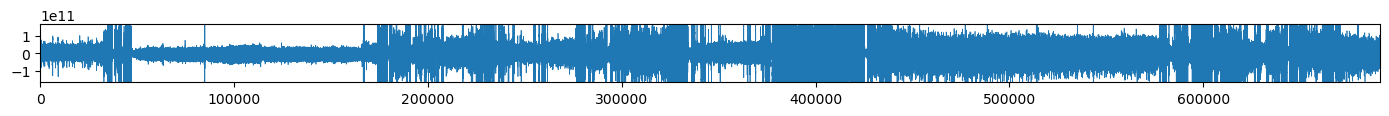

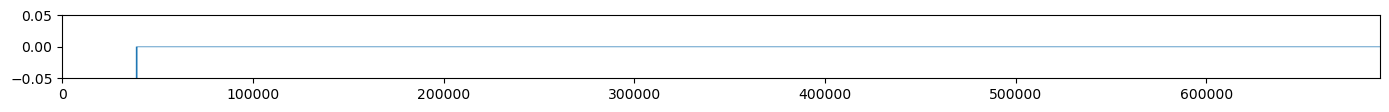

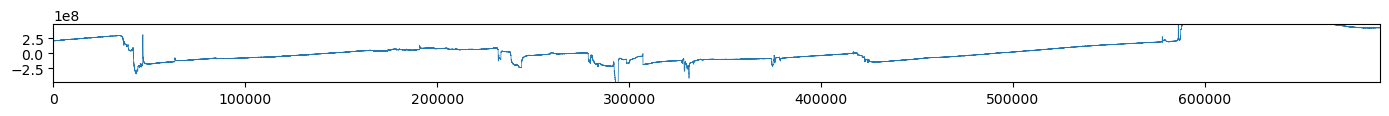

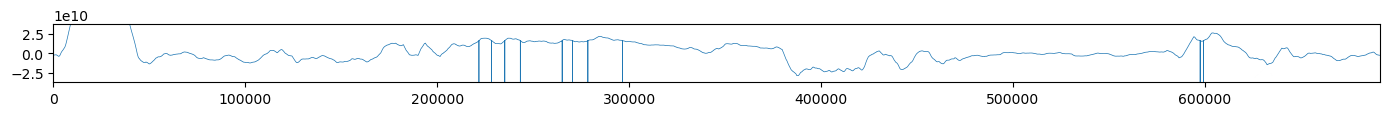

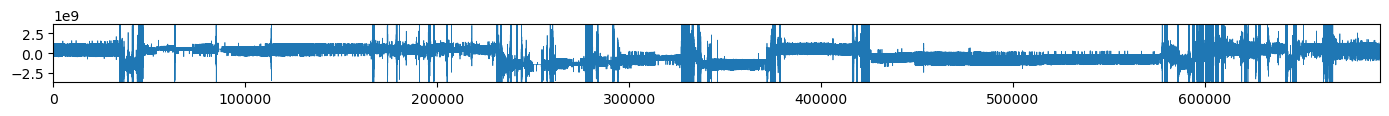

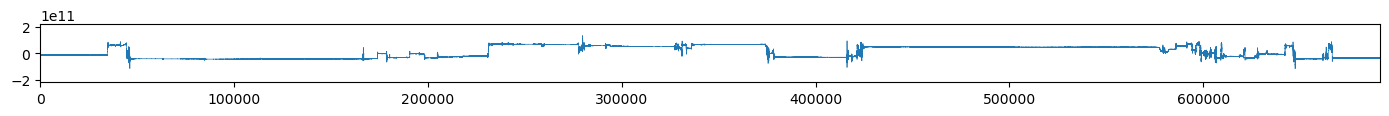

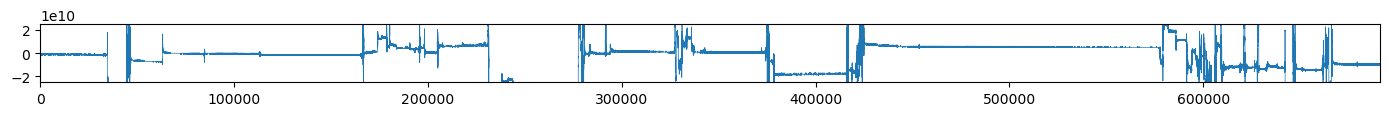

In [74]:
plot_all_channels(res, start=0, length=len(res))

In [75]:
segment = 21
e4_signals = dict()
for folder, channels in INPUT_CH.items():
    for ch in channels:
        e4_signals[(folder, ch)] = retrieve_segment(DATA_DIR, SUBJECT_ID, folder, ch, segment)

In [76]:
print('TEMP', min(e4_signals[('TEMP', 'TEMP')].iloc[:, 1]), np.average(e4_signals[('TEMP', 'TEMP')].iloc[:, 1]), max(e4_signals[('TEMP', 'TEMP')].iloc[:, 1]))
print('BVP', min(e4_signals[('BVP', 'BVP')].iloc[:, 1]), np.average(e4_signals[('BVP', 'BVP')].iloc[:, 1]), max(e4_signals[('BVP', 'BVP')].iloc[:, 1]))
print('EDA', min(e4_signals[('EDA', 'EDA')].iloc[:, 1]), np.average(e4_signals[('EDA', 'EDA')].iloc[:, 1]), max(e4_signals[('EDA', 'EDA')].iloc[:, 1]))
print('HR', min(e4_signals[('HR', 'HR')].iloc[:, 1]), np.average(e4_signals[('HR', 'HR')].iloc[:, 1]), max(e4_signals[('HR', 'HR')].iloc[:, 1]))

TEMP 31570548736.0 31585935000.0 31589793792.0
BVP -1719801741312.0 -34526044.0 1838749974528.0
EDA 899756.4375 361652670.0 444929568.0
HR 0.0 75622280000.0 140629393408.0


In [77]:
len(e4_signals[('HR', 'HR')])

460000

BVP --> BVP
TEMP --> TEMP
EDA --> EDA
HR --> HR
ACC --> Acc Mag
ACC --> Acc x
ACC --> Acc y
ACC --> Acc z


/Users/jozsi/miniconda3/envs/ails2/lib/python3.11/site-packages/seerpy/utils.py:465: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



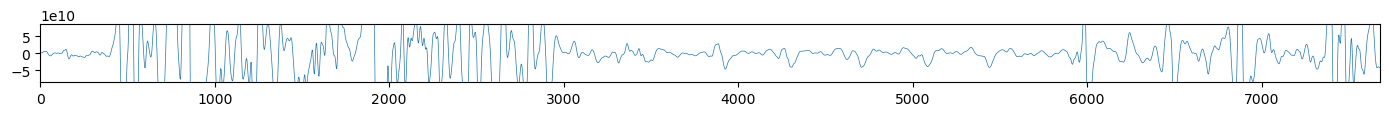

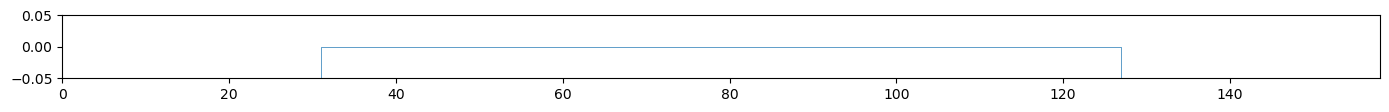

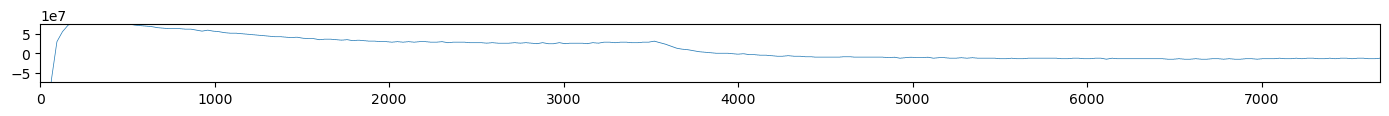

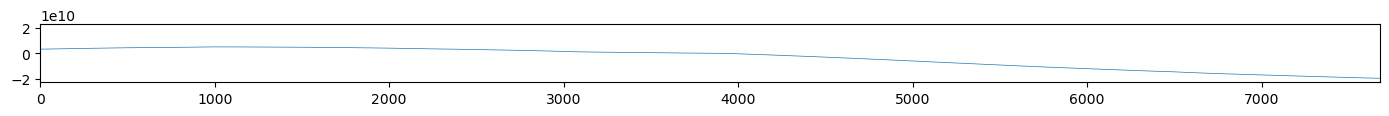

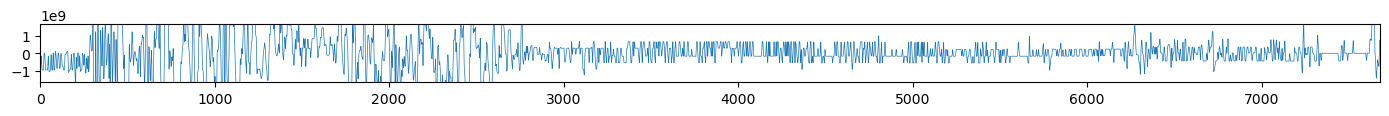

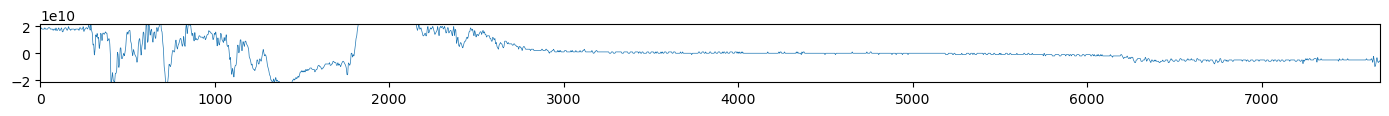

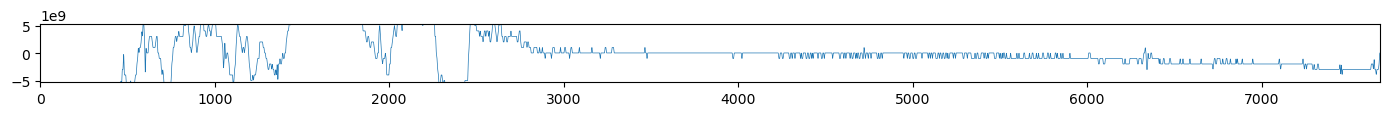

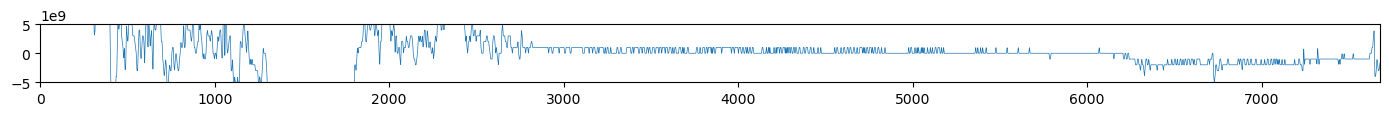

In [78]:
for key in e4_signals:
    print(key[0], '-->', key[1])
    plot_data(e4_signals[key])

In [79]:
eda_signal = e4_signals[('EDA', 'EDA')].iloc[0:1*7680, 1]
eda, eda_info = nk.eda_process(eda_signal, sampling_rate=128, method='neurokit', report='myreport.html')
nk.eda_plot(eda, eda_info, static=False)

The raw signal, sampled at 128 Hz, was cleaned using the default method of the neurokit2 package.

The signal was decomposed into phasic and tonic components using the method described in neurokit.

The cleaned signal was used to detect peaks using the default method of the `neurokit2` package.



References
- https://doi.org/10.21105/joss.01667
The report has been saved to myreport.html


The raw signal, sampled at 128 Hz, was preprocessed using a bandpass filter ([0.5 - 8 Hz], Butterworth 3rd order; following Elgendi et al., 2013).

The peak detection was carried out using the method described in Elgendi et al. (2013).

   PPG_Rate_Mean  PPG_Rate_SD
0      57.919398     33.32261

References
- Elgendi M, Norton I, Brearley M, Abbott D, Schuurmans D (2013)
            Systolic Peak Detection in Acceleration Photoplethysmograms
            Measured from Emergency Responders in Tropical Conditions
            PLoS ONE 8(10): e76585. doi:10.1371/journal.pone.0076585.
- Makowski, D., Pham, T., Lau, Z. J., Brammer, J. C., Lespinasse, F., Pham, H.,
    Schölzel, C., & Chen, S. A. (2021). NeuroKit2: A Python toolbox for neurophysiological signal processing.
    Behavior Research Methods, 53(4), 1689–1696. https://doi.org/10.3758/s13428-020-01516-y
    
The report has been saved to bvp_report.html


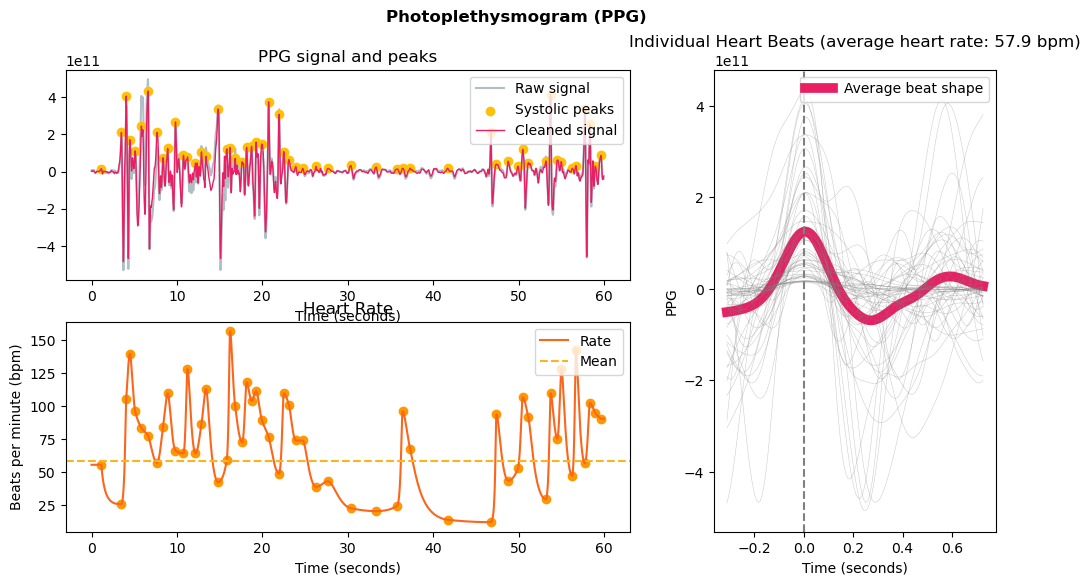

In [80]:
bvp_signal = e4_signals[('BVP', 'BVP')].iloc[0:1*7680, 1]
bvp, bvp_info = nk.ppg_process(bvp_signal, sampling_rate=128, method='elgendi', report='bvp_report.html')
fig = plt.gcf()
fig.set_size_inches(12, 6, forward=True)


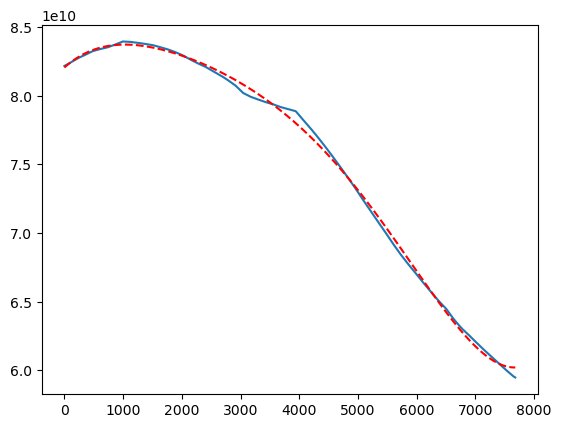

In [81]:
hr_signals = e4_signals[('HR', 'HR')].iloc[0:1*7680, 1]
x = np.arange(len(hr_signals))
y = hr_signals
z = np.polyfit(x, hr_signals, 5)
p = np.poly1d(z)
plt.plot(hr_signals)
plt.plot(x, p(x), "r--")

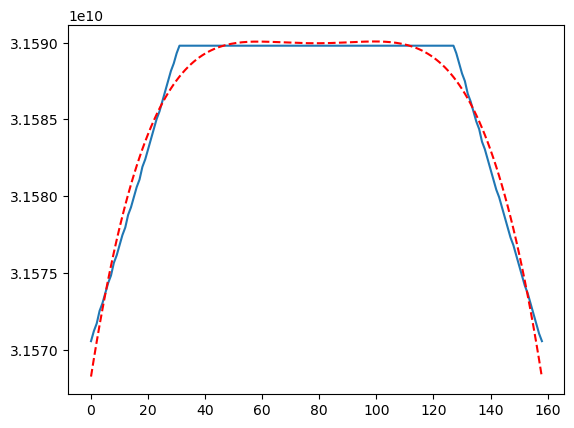

In [82]:
temp_signals = e4_signals[('TEMP', 'TEMP')].iloc[0:1*7680, 1]
x = np.arange(len(temp_signals))
y = temp_signals
z = np.polyfit(x, temp_signals, 5)
p = np.poly1d(z)
plt.plot(temp_signals)
plt.plot(x, p(x), "r--")

In [83]:
def fftPlot(sig, dt=None, plot=True):
    # assumes analytic signal (real signal...) - so only half of the axis is required

    if dt is None:
        dt = 1
        t = np.arange(0, sig.shape[-1])
        xLabel = 'samples'
    else:
        t = np.arange(0, sig.shape[-1]) * dt
        xLabel = 'freq [Hz]'

    if sig.shape[0] % 2 != 0:
        print("signal preferred to be even in size, autoFixing it...")
        t = t[0:-1]
        sig = sig[0:-1]

    sigFFT = np.fft.fft(sig) / t.shape[0]  # Divided by size t for coherent magnitude

    freq = np.fft.fftfreq(t.shape[0], d=dt)

    # Plot analytic signal - right half of frequency axis needed only...
    firstNegInd = np.argmax(freq < 0)
    freqAxisPos = freq[0:firstNegInd]
    sigFFTPos = 2 * sigFFT[0:firstNegInd]  # *2 because of magnitude of analytic signal

    if plot:
        plt.figure()
        plt.plot(freqAxisPos, 15 * np.log(1 + np.abs(sigFFTPos)))
        plt.xlabel(xLabel)
        plt.ylabel('mag')
        plt.title('Analytic FFT plot')
        plt.show()

    return sigFFTPos, freqAxisPos

signal preferred to be even in size, autoFixing it...


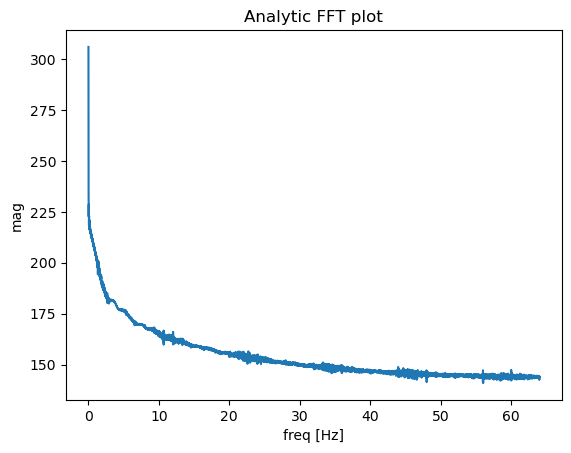

(array([ 7.23305268e+08+0.00000000e+00j,  1.44690993e+07-1.33321916e+06j,
         8.25540391e+06-8.47876509e+06j, ...,
        -1.48156033e+04-5.97400617e+02j, -1.33068482e+04+6.70299928e+02j,
        -1.47152281e+04+2.58945665e+02j]),
 array([0.00000000e+00, 5.19143413e-03, 1.03828683e-02, ...,
        6.39844257e+01, 6.39896171e+01, 6.39948086e+01]))

In [84]:
eda_values = np.asarray(e4_signals[('EDA', 'EDA')].iloc[:, 1])
dt = 1 / 128
fftPlot(eda_values, dt=dt)

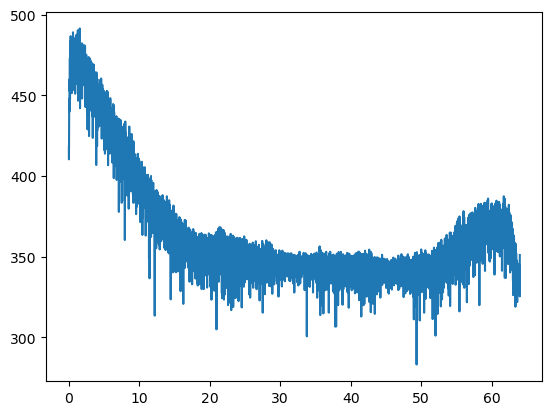

In [85]:
bvp_values = np.asarray(e4_signals[('BVP', 'BVP')].iloc[0:100*128, 1])

fft_bvp = np.fft.rfft(bvp_values)
freq = np.fft.rfftfreq(len(bvp_values), 1./128.)
plt.plot(freq, 15*np.log(1 + np.abs(fft_bvp)))

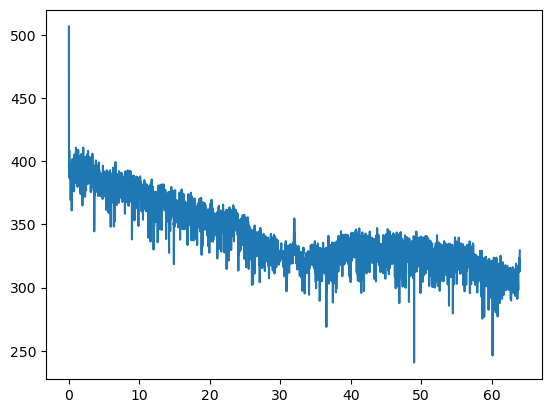

In [56]:
eda_values = np.asarray(e4_signals[('ACC', 'Acc Mag')].iloc[0:1*7680, 1])

fft_eda = np.fft.rfft(eda_values)
freq = np.fft.rfftfreq(len(eda_values), 1./128.)
plt.plot(freq, 15*np.log(1 + np.abs(fft_eda)))

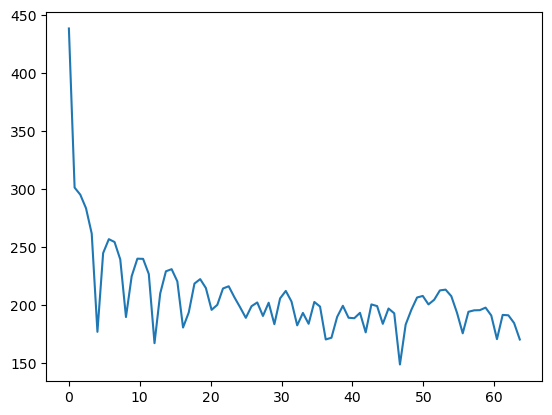

In [86]:
temp_values = np.asarray(e4_signals[('TEMP', 'TEMP')].iloc[0:100*128, 1])

fft_temp = np.fft.rfft(temp_values)
freq = np.fft.rfftfreq(len(temp_values), 1./128.)
plt.plot(freq, 15*np.log(1 + np.abs(fft_temp)))

(512,)
0.2558211561897068


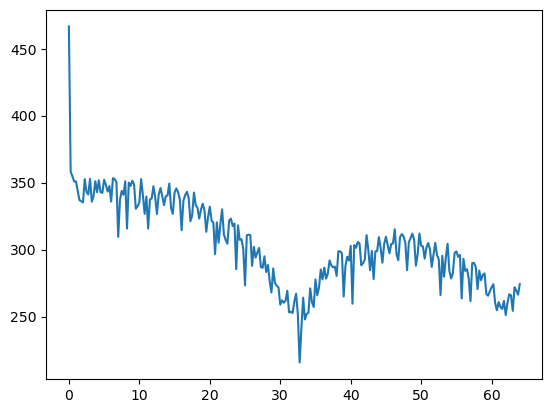

In [57]:
accmag = np.asarray(res[['ACC_Acc Mag']]).reshape(-1)
slice = accmag[0:4*128]
print(slice.shape)
fft_accmag = np.fft.rfft(slice)
freq = np.fft.rfftfreq(len(slice), 1./128.)
plt.plot(freq, 15*np.log(1 + np.abs(fft_accmag)))
narrow_physio_domain = np.sum([np.abs(v) for f, v in zip(freq, fft_accmag) if .8 <= f <= 5.])
broadband_domain = np.sum([np.abs(v) for f, v in zip(freq, fft_accmag) if .8 <= f])
print(narrow_physio_domain / broadband_domain)

In [87]:
# determine pre-ictal period
end = (datetime.fromisoformat('2019-10-20 13:35:16.000000').timestamp() - 15 * 60) * 1000
start = end - 60 * 60 * 1000

print(start)
print(end)
print(datetime.fromtimestamp(start/1000))
print(datetime.fromtimestamp(end/1000))

1571566816000.0
1571570416000.0
2019-10-20 12:20:16
2019-10-20 13:20:16
